<a href="https://colab.research.google.com/github/DeepPandya30/DHC/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 2: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 3: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 4: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 5: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 6: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 7: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 8: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 9: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 5)], Length = 8
Generation 10: Best Path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5

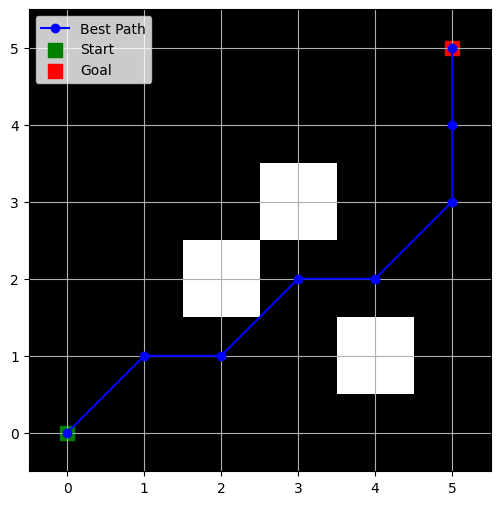

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define Grid Environment
GRID_SIZE = 6  # 6x6 Grid
START = (0, 0)
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 3), (1, 4)}  # Set of obstacle coordinates

# Generate Random Paths
def generate_population(size):
    population = []
    for _ in range(size):
        path = [START]
        while path[-1] != GOAL:
            x, y = path[-1]
            next_moves = [(x+1, y), (x, y+1), (x+1, y+1)]
            next_moves = [(nx, ny) for nx, ny in next_moves if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and (nx, ny) not in OBSTACLES]
            if not next_moves:
                break  # Dead end
            path.append(random.choice(next_moves))
        population.append(path)
    return population

# Fitness Function: Shorter paths & avoiding obstacles
def fitness_function(path):
    return -len(path) if path[-1] == GOAL else -999  # Penalize incomplete paths

# Selection: Roulette Wheel with Fallback
def selection(population):
    fitness_scores = [fitness_function(p) for p in population]

    # Ensure all paths have valid fitness values
    min_fitness = min(fitness_scores)

    # Shift scores to avoid zero or negative total fitness
    adjusted_fitness_scores = [f - min_fitness + 1 for f in fitness_scores]  # Ensures all values are positive
    total_fitness = sum(adjusted_fitness_scores)

    # If all paths have the same fitness (total_fitness == 0), pick randomly
    if total_fitness == 0:
        return random.sample(population, 2)

    probabilities = [f / total_fitness for f in adjusted_fitness_scores]
    return random.choices(population, probabilities, k=2)

# Crossover: Combine two paths at a random point
def crossover(parent1, parent2):
    cut = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:cut] + parent2[cut:]
    child2 = parent2[:cut] + parent1[cut:]
    return child1, child2

# Mutation: Randomly alter a point in the path
def mutate(path):
    if random.random() < 0.3:
        idx = random.randint(1, len(path) - 2)
        x, y = path[idx]
        next_moves = [(x+1, y), (x, y+1), (x-1, y), (x, y-1)]
        next_moves = [(nx, ny) for nx, ny in next_moves if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and (nx, ny) not in OBSTACLES]
        if next_moves:
            path[idx] = random.choice(next_moves)
    return path

# Elitism: Keep the best path
def elitism(population):
    return max(population, key=fitness_function)

# Plot the Path
def plot_path(best_path):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for ox, oy in OBSTACLES:
        grid[ox, oy] = -1  # Mark obstacles

    path_x, path_y = zip(*best_path)
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap='gray_r', origin='lower')
    plt.plot(path_y, path_x, marker='o', color='b', label='Best Path')
    plt.scatter(START[1], START[0], color='g', marker='s', s=100, label='Start')
    plt.scatter(GOAL[1], GOAL[0], color='r', marker='s', s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(GRID_SIZE))
    plt.yticks(range(GRID_SIZE))
    plt.show()

# Run the Improved Genetic Algorithm
def improved_genetic_algorithm(generations=10, pop_size=5):
    population = generate_population(pop_size)
    for gen in range(generations):
        new_population = [elitism(population)]
        while len(new_population) < pop_size:
            p1, p2 = selection(population)
            c1, c2 = crossover(p1, p2)
            new_population.extend([mutate(c1), mutate(c2)])
        population = new_population[:pop_size]
        best = elitism(population)
        print(f"Generation {gen+1}: Best Path = {best}, Length = {len(best)}")
    plot_path(best)

# Run the IGA for Path Planning
improved_genetic_algorithm()
